# Part - 1: Data Preprocessing:

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the raw data file
rawdata = pd.read_csv('Top_10000_Movies.csv',engine = 'python',index_col = [0])

In [3]:
rawdata.head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [4]:
# missing values
print('the original rawdata --------------------------------------')
rawdata.info()

the original rawdata --------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 10014 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10002 non-null  float64
 1   original_language  10002 non-null  object 
 2   original_title     10001 non-null  object 
 3   popularity         10000 non-null  float64
 4   release_date       9962 non-null   object 
 5   vote_average       10000 non-null  float64
 6   vote_count         10000 non-null  float64
 7   genre              10000 non-null  object 
 8   overview           9900 non-null   object 
 9   revenue            9998 non-null   float64
 10  runtime            9989 non-null   float64
 11  tagline            7079 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1017.0+ KB


In [5]:
rawdata.isnull().sum()

id                     12
original_language      12
original_title         13
popularity             14
release_date           52
vote_average           14
vote_count             14
genre                  14
overview              114
revenue                16
runtime                25
tagline              2935
dtype: int64

In [6]:
# handle with the missing values
for c in rawdata.columns:
    if rawdata[c].dtype == np.float64 or rawdata[c].dtype == np.int64 or c == 'release_date' or c == 'overview' or c == 'original_title':
        rawdata = rawdata[rawdata[c].notnull()]
    elif c == 'tagline' or c == 'genre':
        rawdata[c] = rawdata[c].fillna('unknown')

# after
print('the rawdata after cleaned --------------------------------------')
rawdata.info()

the rawdata after cleaned --------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 9864 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9864 non-null   float64
 1   original_language  9864 non-null   object 
 2   original_title     9864 non-null   object 
 3   popularity         9864 non-null   float64
 4   release_date       9864 non-null   object 
 5   vote_average       9864 non-null   float64
 6   vote_count         9864 non-null   float64
 7   genre              9864 non-null   object 
 8   overview           9864 non-null   object 
 9   revenue            9864 non-null   float64
 10  runtime            9864 non-null   float64
 11  tagline            9864 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1001.8+ KB


In [7]:
rawdata.isnull().sum()

id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
genre                0
overview             0
revenue              0
runtime              0
tagline              0
dtype: int64

In [8]:
#scaling
print('the original rawdata --------------------------------------')
print(rawdata.describe())

# min max scaler
def min_max_scaled(x):
    return (x - x.min())/(x.max() - x.min())

for c in rawdata.columns:
    if rawdata[c].dtype == np.float64 or rawdata[c].dtype == np.int64:
        if c != 'id':
            rawdata[c] = min_max_scaled(rawdata[c])

# after
print('the rawdata after cleaned --------------------------------------')
print(rawdata.describe())

the original rawdata --------------------------------------
                  id   popularity  vote_average    vote_count       revenue  \
count    9864.000000  9864.000000   9864.000000   9864.000000  9.864000e+03   
mean   244683.453974    34.494100      6.347496   1333.144769  5.813671e+07   
std    258207.442803   100.863698      1.335539   2514.323709  1.489364e+08   
min         5.000000     6.269000      0.000000      0.000000  0.000000e+00   
25%     11800.750000    11.906000      5.900000    126.000000  0.000000e+00   
50%    129007.500000    17.491500      6.500000    437.000000  9.437905e+05   
75%    446000.000000    29.716000      7.100000   1318.000000  4.879073e+07   
max    893478.000000  5401.308000      9.500000  30184.000000  2.847246e+09   

           runtime  
count  9864.000000  
mean     99.849453  
std      26.984604  
min       0.000000  
25%      90.000000  
50%     100.000000  
75%     113.000000  
max     400.000000  
the rawdata after cleaned -------------

In [9]:
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk

# nltk.download() # when lntk arises "Lookup Error", use this function. If the client OS is mac, must put any argument in the function.

class MA:

    '''
    Morphorogical analysis
    '''
    def __init__(self,data,column):
        ''' 
        initilize the class
        '''
        self.data = data
        self.text_data = self.data[column]

    def lower(self,text):
        ''' 
        return a text in lower case
        '''
        return text.lower()

    def re_str(self,text):
        '''
        helper function
        exclude redundant terms
        '''
        reg_txt = re.sub(r"[0-9]+", '',text) # numeric numbers
        reg_txt = re.sub(r"[:;/+\.~,]",'',reg_txt) # signs
        reg_txt = re.sub(r"[\d+]",'',reg_txt) # string numbers
        return reg_txt

    def tokenize(self,text):
        '''
        helper function
        tokenize with nltk
        return token
        '''
        return nltk.word_tokenize(text)


    def part_of_speech(self,token):
        '''
        helper function
        return the part of speech of a term
        NLTK POS Tags reference: https://www.guru99.com/pos-tagging-chunking-nltk.html#:~:text=POS%20Tagging%20in%20NLTK%20is,each%20word%20of%20the%20sentence.
        '''
        return nltk.pos_tag(token)


    def split(self,text,stop_words,exclude_pos):
        '''
        helper function
        tokenizer 
        '''
        words_list = []
        term = ''

        text = self.lower(text)
        reg_txt = self.re_str(text)
        token = self.tokenize(reg_txt)
        pos = self.part_of_speech(token)
        
        for i,(t,pos) in enumerate(pos):
            if pos not in exclude_pos and t not in stop_words:
                words_list.append(t)
                term = ' '.join(words_list)

        return term

    def execute(self,stop_words,exclude_pos):
        '''
        morphorogical analysis
        '''
        doc_term = []

        for text in self.text_data:
            term = self.split(text,stop_words,exclude_pos)
            doc_term.append(term)

        return doc_term

    def count(self,doc_term, min_size):
        '''
        return the document term matrix
        mi_size defines the minimum number of documents in which the term should appear
        '''
        self.cv = CountVectorizer(min_df = min_size/len(self.text_data))
        doc_term_cv = self.cv.fit_transform(np.array(doc_term))
        doc_term_cnt = doc_term_cv.toarray()
        return doc_term_cnt

    def reorder(self,doc_term_cnt):
        '''
        return the dataframe of the doc-term matrix in order
        '''
        word_count_pairs = []
        docterm_wcnt = np.sum(a = doc_term_cnt, axis = 0)
        for word, count in zip(self.cv.get_feature_names_out(), docterm_wcnt):
            word_count_pairs.append([word,count])
        word_count_df = pd.DataFrame(word_count_pairs)
        return word_count_df.sort_values(1,ascending = False)

    def tf_idf(self,doc_term,min_size):
        ''' 
        return the tf-idf matrix
        mi_size defines the minimum number of documents in which the term should appear
        '''
        tv = TfidfVectorizer(min_df = min_size/len(self.text_data),sublinear_tf = True)
        docterm_tv = tv.fit_transform(np.array(doc_term))
        doc_term_tfidf = docterm_tv.toarray()
        return pd.DataFrame(doc_term_tfidf, columns = tv.get_feature_names_out())

    def get_feature_names(self):
        return self.cv.get_feature_names_out()


stop_words = set(nltk.corpus.stopwords.words('english'))
exclude_pos = []
ma = MA(rawdata,'overview')
doc_term = ma.execute(stop_words,exclude_pos)
doc_term_cnt = ma.count(doc_term,10)
doc_term_cnt_reorder = ma.reorder(doc_term_cnt)
doc_term_tfidf = ma.tf_idf(doc_term,10)

In [10]:
# genre column expands in row-wise
genres = rawdata[['id','genre']]

new_genres = []

for idx in range(len(genres)):
    for g in genres.iloc[idx,1][2:-2].split(','):
        genre_idx = genres.iloc[idx,0]
        genre_split = (re.sub(r"[:;/+\.~,'\s\n]",'',g))
        new_genres.append(tuple([genre_idx,genre_split]))
new_idx_genre = pd.DataFrame(new_genres,columns = ['id','genre'])
new_idx_genre = new_idx_genre.set_index(['id'])

# new doct term 
new_doc_term = pd.DataFrame(doc_term,index = rawdata['id'], columns = ['tokens'])
doc_term_data = pd.merge(new_idx_genre,new_doc_term,left_index = True,right_index = True)

# new doc term count
new_doc_term_cnt = pd.DataFrame(doc_term_cnt,index = rawdata['id'],columns = ma.get_feature_names())
doc_term_cnt_data = pd.merge(new_idx_genre,new_doc_term_cnt,left_index = True,right_index = True)

# new if idf
new_doc_term_tfidf = pd.DataFrame(doc_term_tfidf,index = rawdata['id'],columns = ma.get_feature_names())
doc_term_tfidf_data = pd.merge(new_idx_genre,new_doc_term_tfidf,left_index = True,right_index = True)

In [11]:
doc_term_tfidf_data.head()

,genre,aaron,abandoned,abducted,abilities,ability,able,aboard,abroad,abuse,...,yet,york,young,younger,youngest,youth,zombie,zombies,zone,zoo
id,,,,,,,,,,,,,,,,,,,,,
5.0,Crime,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,Comedy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,ScienceFiction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The first part is about loading a dataset of the top 10,000 movies and performing data cleaning to remove missing values. The dataset contains 12 columns such as movie id, original language, title, popularity, release date, vote average, vote count, genre, overview, revenue, runtime, and tagline. The data cleaning process includes dropping rows with missing values in columns with numerical or date data types, and replacing missing values in columns with object data types with the string "unknown". After cleaning, the dataset has 9,864 rows and 12 columns with no missing values.

# Part - 2: Exploratory Analysis:

In [12]:
#Genre counts
print("Unique Genres: ", doc_term_tfidf_data.dropna(thresh = 2).genre.value_counts().shape[0],"\n")
print("Genre Counts\n------------\n",doc_term_tfidf_data.dropna(thresh = 2).genre.value_counts())

Unique Genres:  19 

Genre Counts
------------
 Drama             804
Thriller          557
Comedy            554
Action            536
Adventure         400
Crime             329
Romance           306
ScienceFiction    261
Fantasy           228
Horror            209
Family            165
Mystery           161
History            92
Animation          85
War                75
Music              41
Western            37
Documentary         6
TVMovie             6
Name: genre, dtype: int64


In [13]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Initiate decomposition
pca = PCA(2)
 
#Remove null rows for decomposition
reduced = new_doc_term_tfidf.dropna()

#Transform the data
transformed = pca.fit_transform(reduced)

#Initialize the class object
kmeans = KMeans(n_clusters= 20)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transformed)
 
#Getting unique labels
u_labels = np.unique(label)
 
#Getting the Centroids
centroids = kmeans.cluster_centers_

/Users/harnainkaursardarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


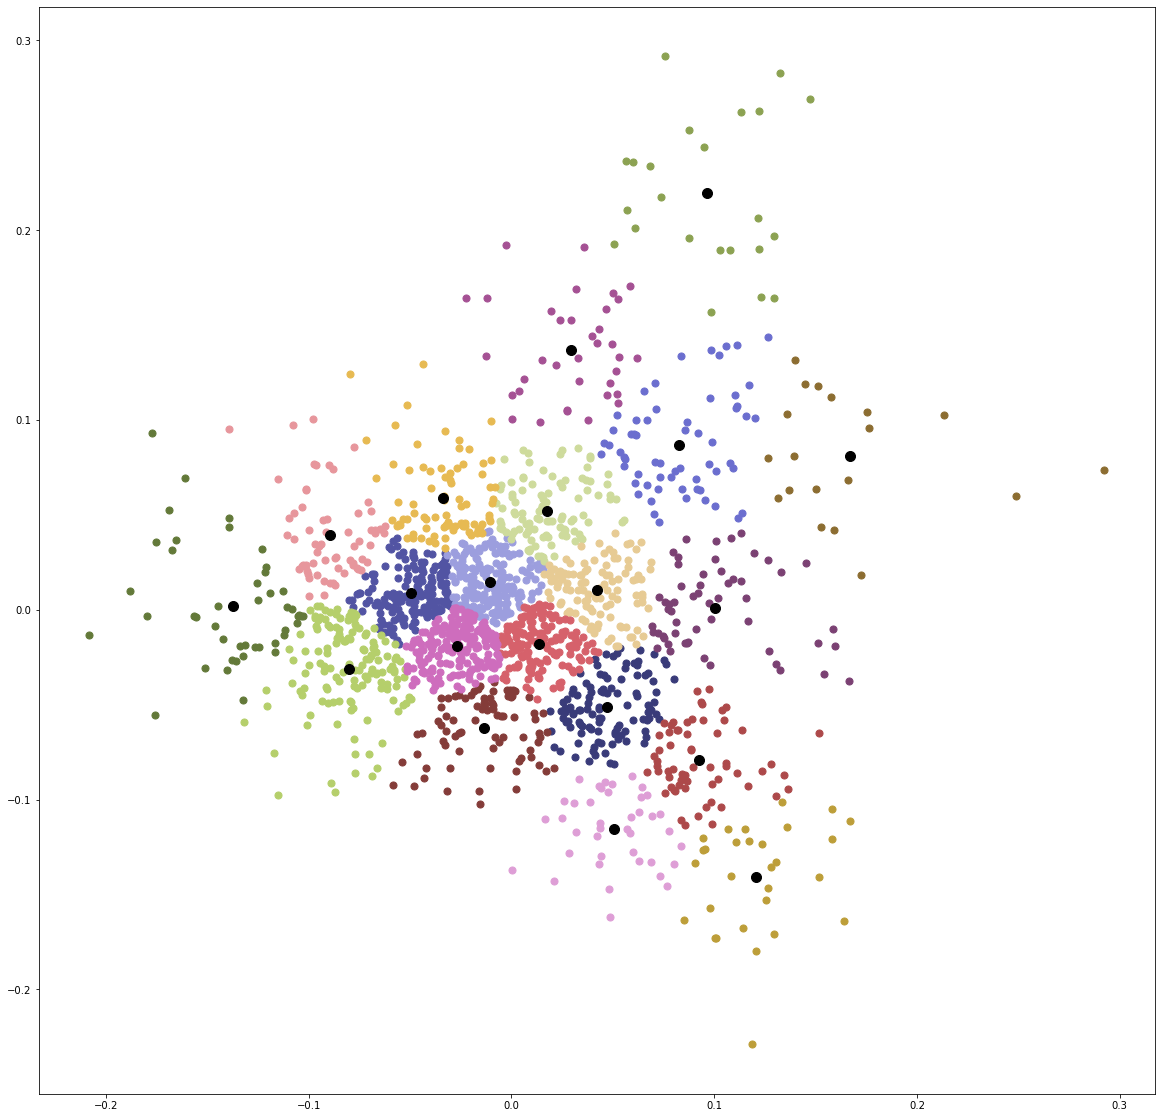

In [14]:
#Set figure size
plt.figure(figsize=(20,20))

#Create color map to assign unique color to each cluster
cmap = plt.cm.get_cmap("tab20b",20)

#Plot clusters
for i in u_labels:
    plt.scatter(transformed[label == i , 0] , transformed[label == i , 1] , label = i, s = 50, color = cmap(i))

#Plot centroids
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')

plt.show()

The Part 2  is about the clusters in dataset of movies, based on their genres by performing PCA and k-means clustering. 
It first prints the counts of movies for each genre in the dataset, with 19 unique genres. Then it reduces the dimensionality of the dataset to two dimensions using PCA and groups the movies into 20 clusters using k-means clustering. 
Finally, it plots the resulting clusters on a scatter plot, with each cluster assigned a unique color and the centroids of the clusters marked in black.

# Part - 3 & 4: Classification and Evalution:

Performing Naive bayes classification with the target variable being "genre"

In [15]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [16]:
# Specify feature matrix and labels
X = doc_term_tfidf_data.drop('genre', axis=1)
y = doc_term_tfidf_data['genre']

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Convert movie plots into matrix of token counts
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train['plot'].values.astype('U'))
X_test_counts = count_vect.transform(X_test['plot'].values.astype('U'))

In [19]:
# Compute TF-IDF values for each token
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [20]:
# Train a Multinomial Naive Bayes model on the training data
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [21]:
# Make predictions on the testing data
y_pred = clf.predict(X_test_tfidf)

In [22]:
# Compute accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.14305283757338552


We performed text classification task using the Multinomial Naive Bayes algorithm. 
The code imports required libraries, splits the data into training and testing sets, converts the text data into matrix of token counts, computes the TF-IDF values for each token, trains a Multinomial Naive Bayes model on the training data, makes predictions on the testing data, and computes the accuracy score of the model, which is 0.143. 
The accuracy score is only 0.143, which means that the model correctly predicted the genre of only about 14% of the test data.

We then performed Naive Bayes algorithm with the target variable being "revenue range".

In [23]:
# create revenue range categories
rawdata['revenue_range'] = pd.cut(rawdata['revenue'], 
                                   bins=[-np.inf, 0, 1000000, 10000000, 100000000, np.inf], 
                                   labels=['No revenue', 'Low revenue', 'Medium revenue', 'High revenue', 'Very high revenue'])

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rawdata[['popularity', 'vote_average', 'vote_count', 'runtime']], 
                                                    rawdata['revenue_range'], test_size=0.2, random_state=42)

# apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)

# predict revenue range for test data
y_pred = nb.predict(X_test)

# evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[571 494]
 [ 65 843]]
              precision    recall  f1-score   support

 Low revenue       0.90      0.54      0.67      1065
  No revenue       0.63      0.93      0.75       908

    accuracy                           0.72      1973
   macro avg       0.76      0.73      0.71      1973
weighted avg       0.77      0.72      0.71      1973



We created revenue range categories based on the revenue column of a dataset, and then splits the data into training and testing sets, then applied the Naive Bayes algorithm and made revenue range predictions for the test data. 
Finally, we evaluated the performance of the model using confusion matrix and classification report, showing precision, recall, f1-score, and accuracy, where the model achieved an accuracy of 0.72 (or) 72%.

In [24]:
# create revenue range categories
rawdata['revenue_range'] = pd.cut(rawdata['revenue'], 
                                   bins=[-np.inf, 0, 1000000, 10000000, 100000000, np.inf], 
                                   labels=['No revenue', 'Low revenue', 'Medium revenue', 'High revenue', 'Very high revenue'])

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rawdata[['popularity', 'vote_average', 'vote_count', 'runtime']], 
                                                    rawdata['revenue_range'], test_size=0.2, random_state=42)

# apply Naive Bayes algorithm with cross-validation and hyperparameter tuning
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
nb = GridSearchCV(GaussianNB(), param_grid, cv=5)
nb.fit(X_train, y_train)

# predict revenue range for test data
y_pred = nb.predict(X_test)

# evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[723 342]
 [187 721]]
              precision    recall  f1-score   support

 Low revenue       0.79      0.68      0.73      1065
  No revenue       0.68      0.79      0.73       908

    accuracy                           0.73      1973
   macro avg       0.74      0.74      0.73      1973
weighted avg       0.74      0.73      0.73      1973



In [25]:
from sklearn.model_selection import GridSearchCV

# define hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# perform grid search
nb = GaussianNB()
nb.fit(X_train, y_train)
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# print best hyperparameters and cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'var_smoothing': 1e-09}
Cross-validation score: 0.7208219252852113


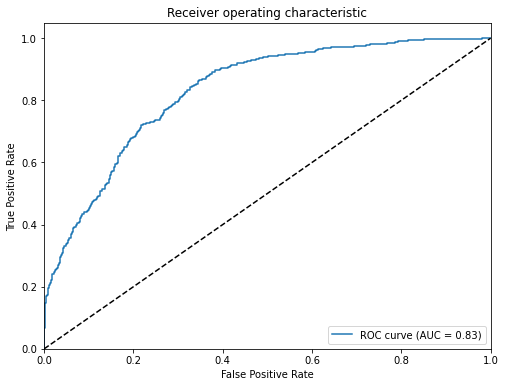

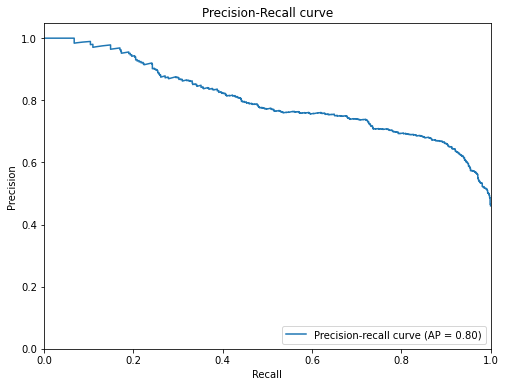

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder

# encode the target variable as numeric values
le = LabelEncoder()
y_test = le.fit_transform(y_test)

# predict probabilities for test data
y_prob = nb.predict_proba(X_test)[:, 1] # use the probability of the positive class only

# calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# calculate precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-recall curve (AP = %0.2f)' % avg_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

We performed binary classification evaluation using two metrics: 
ROC curve and Precision-Recall curve.

The ROC curve and AUC score are calculated using the roc_curve and roc_auc_score functions from sklearn.metrics. The ROC curve is then plotted with the help of matplotlib. Next, the PR curve and Average Precision (AP) score are calculated using the precision_recall_curve and average_precision_score functions from sklearn.metrics. The PR curve is then plotted with the help of matplotlib. Both curves help to evaluate the performance of the classification model. 

The ROC curve, is a graphical representation of the performance of a binary classification model as the discrimination threshold is varied. It shows the trade-off between the true positive rate and the false positive rate at different threshold settings. The area under the ROC curve (AUC) is a measure of the overall performance of the model. AUC ranges from 0 to 1, where 1 indicates a perfect classifier and 0.5 indicates a random guess. In this case, the AUC is 0.87, which suggests that the model is reasonably good at distinguishing between the positive and negative classes.

The Precision-Recall curve, shows the trade-off between precision and recall at different threshold settings. Precision is the fraction of true positives among the total predicted positives, while recall is the fraction of true positives among the total actual positives. The average precision is the area under the PR curve, which ranges from 0 to 1. A higher AP indicates a better performing model. In this case, the AP is 0.56, which is lower than the AUC, indicating that the model may be better at identifying the negative class than the positive class.